## <center>Assignment 3 - Machine Learning <br> Notebook made by  </center>

|**Name** | **Student id** | **email**|
|:- |:-|:-|
|Narendra Parigi|12089265|naren.parigi@gmail.com|
|Tim Pellenkoft|0440884|ccc@xxx.nl|
|Ralph Nabben|12309001|ralph.nabben@tip.nl|
|Ahron Zijlstra|6087418|ccc@xxx.nl|


In [1]:
import os
import gzip
import requests
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from urllib.request import urlopen

pd.options.display.max_columns = None
%matplotlib inline
warnings.filterwarnings('ignore')
#pd.options.mode.chained_assignment = None

### <a> 0. Approach </a>

- The dataset is big so, we will use the sample data set (kddcup.data_10_percent.gz -> 10% subset) as training data for the assignment.
- The best models are evaluated against the labeled test dataset (corrected.gz -> test data with corrected labels)

### <a> 1. Download Data </a>

Lets define datatypes in such way the datasets uses less memory and computations are faser.

In [2]:
dtypes = { "duration": np.int8, "protocol_type": np.object, "service": np.object, "flag": np.object,
           "src_bytes":  np.int8, "dst_bytes":  np.int8, "land": np.bool, "wrong_fragment":  np.int8,
           "urgent": np.int8, "hot": np.int8, "num_failed_logins":  np.int8, "logged_in":  np.bool,
           "num_compromised":  np.int8, "root_shell":  np.bool, "su_attempted":  np.int8, "num_root": np.int8,
           "num_file_creations":  np.int8, "num_shells":  np.int8, "num_access_files":  np.int8, 
           "num_outbound_cmds":  np.int8, "is_host_login":  np.bool, "is_guest_login":  np.bool,
           "count": np.int8, "srv_count":  np.int8, "serror_rate": np.float16, "srv_serror_rate": np.float16,
           "rerror_rate": np.float16, "srv_rerror_rate": np.float16, "same_srv_rate": np.float16, 
           "diff_srv_rate": np.float16, "srv_diff_host_rate": np.float16, "dst_host_count":  np.int8,
           "dst_host_srv_count":  np.int8, "dst_host_same_srv_rate": np.float16, "dst_host_diff_srv_rate": np.float16,
           "dst_host_same_src_port_rate": np.float16, "dst_host_srv_diff_host_rate": np.float16,
           "dst_host_serror_rate": np.float16, "dst_host_srv_serror_rate": np.float16, "dst_host_rerror_rate": np.float16,
           "dst_host_srv_rerror_rate": np.float16, "attack": np.object }

Map column names for both training and test dataset

In [3]:
cnames = ['duration','protocol_type','service','flag','src_bytes','dst_bytes',
          'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
          'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
          'num_shells','num_access_files','num_outbound_cmds','is_host_login',
          'is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
          'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
          'srv_diff_host_rate','dst_host_count','dst_host_srv_count',
          'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
          'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
          'dst_host_rerror_rate','dst_host_srv_rerror_rate','attack']

#### <a> 1.1 Train dataset </a>

The below code snippet downloads the <b> training </b> dataset from API.

In [4]:
url = "https://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)
with gzip.open('kddcup.data_10_percent.gz') as f:
     df_train = pd.read_csv(f, names=cnames, dtype=dtypes, header=None)
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,http,SF,-75,74,False,0,0,0,0,True,0,False,0,0,0,0,0,0,False,False,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.109985,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,-17,-26,False,0,0,0,0,True,0,False,0,0,0,0,0,0,False,False,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.049988,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,-21,57,False,0,0,0,0,True,0,False,0,0,0,0,0,0,False,False,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.029999,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,-37,57,False,0,0,0,0,True,0,False,0,0,0,0,0,0,False,False,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.029999,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,-39,-16,False,0,0,0,0,True,0,False,0,0,0,0,0,0,False,False,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.020004,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
print('The number of categories in train data set {}'.format(len(df_train['attack'].unique())))
print('The size of the train dataset is {}'.format(df_train.shape[0]))

The number of categories in train data set 23
The size of the train dataset is 494021


In total, there are 42 columns including target column. The train dataset has 23 categories mapped to target column.

#### <a> 1.2 Test dataset </a>

The below code snippet downloads the <b> test </b> dataset from API.

In [7]:
url = "https://kdd.ics.uci.edu/databases/kddcup99/corrected.gz"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)
with gzip.open('corrected.gz') as f:
     df_test = pd.read_csv(f, names=cnames, dtype=dtypes, header=None)
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,private,SF,105,-110,False,0,0,0,0,False,0,False,0,0,0,0,0,0,False,False,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-2,1.0,0.010002,0.000000,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,-110,False,0,0,0,0,False,0,False,0,0,0,0,0,0,False,False,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-2,1.0,0.010002,0.000000,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,-110,False,0,0,0,0,False,0,False,0,0,0,0,0,0,False,False,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-2,1.0,0.010002,0.000000,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,-110,False,0,0,0,0,False,0,False,0,0,0,0,0,0,False,False,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-2,1.0,0.010002,0.000000,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,-110,False,0,0,0,0,False,0,False,0,0,0,0,0,0,False,False,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-2,1.0,0.010002,0.010002,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [8]:
print('The number of categories in train data set {}'.format(len(df_test['attack'].unique())))

The number of categories in train data set 38


In total, there are 42 columns including target column. There are 38 categories mapped to target column. Thus, in test dataset we have unseen categories, the model will not perform good with unseen categories so, we will select only the categories common in both test and train data set.

In [9]:
df_test = df_test[df_test['attack'].isin(df_train['attack'].unique())]
print('The number of categories in train data set after filtering {}'.format(len(df_test['attack'].unique())))
print('The size of the test dataset is {}'.format(df_test.shape[0]))

The number of categories in train data set after filtering 21
The size of the test dataset is 292300


There is no data for categories spy. and warezclient. in the test dataset.

#### <a> 1.3 Test dataset unlabeled </a>

As of now, no plans to use this dataset but we will see depending on the time and work.

In [10]:
url = "https://kdd.ics.uci.edu/databases/kddcup99/kddcup.testdata.unlabeled_10_percent.gz"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)
with gzip.open('kddcup.testdata.unlabeled_10_percent.gz') as f:
     df_test_unlabeled = pd.read_csv(f, names=cnames[:len(cnames)-1], dtype=dtypes, header=None)
df_test_unlabeled.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,udp,private,SF,105,-110,False,0,0,0,0,False,0,False,0,0,0,0,0,0,False,False,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-2,1.0,0.010002,0.000000,0.0,0.0,0.0,0.0,0.0
1,0,udp,private,SF,105,-110,False,0,0,0,0,False,0,False,0,0,0,0,0,0,False,False,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-2,1.0,0.010002,0.000000,0.0,0.0,0.0,0.0,0.0
2,0,udp,private,SF,105,-110,False,0,0,0,0,False,0,False,0,0,0,0,0,0,False,False,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-2,1.0,0.010002,0.000000,0.0,0.0,0.0,0.0,0.0
3,0,udp,private,SF,105,-110,False,0,0,0,0,False,0,False,0,0,0,0,0,0,False,False,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-2,1.0,0.010002,0.000000,0.0,0.0,0.0,0.0,0.0
4,0,udp,private,SF,105,-110,False,0,0,0,0,False,0,False,0,0,0,0,0,0,False,False,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-2,1.0,0.010002,0.010002,0.0,0.0,0.0,0.0,0.0


In [11]:
print('The size of the test dataset is {}'.format(df_test_unlabeled.shape[0]))

The size of the test dataset is 311029


In total, there are 41 columns and missing target column.

### <a> 2. Preprocessing </a>

#### <a> 2.1 Duplicates check </a>

Checking for duplicates in both train and test dataset. Incase of duplicates, we will remove the duplicates and keep the first record.

In [12]:
df_train.drop_duplicates(subset=cnames, keep='first', inplace=True)
df_test.drop_duplicates(subset=cnames, keep='first', inplace=True)

In [13]:
print ('The size of the train dataset after removing duplicates {}'.format(df_train.shape[0]))
print ('The size of the test dataset after removing duplicates {}'.format(df_test.shape[0]))

The size of the train dataset after removing duplicates 145296
The size of the test dataset after removing duplicates 73062


#### <a> 2.1 Derive new column attack_group </a>

Attack column in train and test data can be mapped to higher level category type. The following is mapping configuration.

In [14]:
attacks_type = { 'normal.': 'normal', 'back.': 'dos', 'buffer_overflow.': 'u2r', 'ftp_write.': 'r2l',
                 'guess_passwd.': 'r2l', 'imap.': 'r2l', 'ipsweep.': 'probe', 'land.': 'dos', 
                 'loadmodule.': 'u2r', 'multihop.': 'r2l', 'neptune.': 'dos', 'nmap.': 'probe', 
                 'perl.': 'u2r', 'phf.': 'r2l', 'pod.': 'dos', 'portsweep.': 'probe', 'rootkit.': 'u2r',
                 'satan.': 'probe', 'smurf.': 'dos', 'spy.': 'r2l', 'teardrop.': 'dos', 'warezclient.': 'r2l',
                 'warezmaster.': 'r2l'}
df_train['attack_group'] = df_train.attack.apply(lambda val: attacks_type[val])
df_test['attack_group'] = df_test.attack.apply(lambda val: attacks_type[val])

In [15]:
df_test.attack_group.value_counts()

normal    47892
dos       21534
r2l        2328
probe      1269
u2r          39
Name: attack_group, dtype: int64

In [16]:
df_train.attack_group.value_counts()

normal    87749
dos       54369
probe      2127
r2l         999
u2r          52
Name: attack_group, dtype: int64

In [17]:
df_train.attack.value_counts()

normal.             87749
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                438
portsweep.            412
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: attack, dtype: int64

- Denial of Service Attack (DoS): 
    - Hackers making resources busy so that legitimate acitivities are unable to run or perform
- User to Root Attack (U2R): 
    - Hacker retrived the user details to login to systems and exploiting the available credentials to get root access.
- Remote to Local Attack (R2L): 
    - Hacker who has an ability to exchage pockets over network is exploiting some vulnerability to gain local access as a user of that machine
- Probing Attack:
    - An attempt to gather information about a network of computers to make its security controls vunerable.

#### <a> 2.2 Derive new target label for binary classification </a>

In [18]:
def derive_attack_bin_group(val):
    """ derives new column """
    if val == 'normal':
        return 'normal'
    else:
        return 'anomaly'

In [19]:
df_train['attack_bin_group'] = df_train.attack_group.apply(lambda val: derive_attack_bin_group(val))
df_test['attack_bin_group'] = df_test.attack_group.apply(lambda val: derive_attack_bin_group(val))

In [20]:
df_train.attack_bin_group.value_counts()

normal     87749
anomaly    57547
Name: attack_bin_group, dtype: int64

In [21]:
df_test.attack_bin_group.value_counts()

normal     47892
anomaly    25170
Name: attack_bin_group, dtype: int64

### <a> 3. Exploratory data analysis </a>

#### <a> 3.1 Null check

Verify if any of the columns have null values so, we can impute the data using different methods.

In [22]:
print('Number of NaN value in training set: ', df_train.isna().sum().sum())
print('Number of NaN value in test set: ', df_test.isna().sum().sum())

Number of NaN value in training set:  0
Number of NaN value in test set:  0


#### <a> 3.2 Catgorical Features </a>

In [23]:
cat_features = df_train.columns[df_train.dtypes=='object']

In [24]:
def plot_column_distribution(df, column):
    """ plot column distribution """
    plt.figure(figsize=(15, 8))
    ax = df[column].value_counts().plot(kind='bar', fontsize=12)
    ax.set_title("Distribution of {}".format(column), fontsize=12)
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for i in ax.patches:
        ax.text(i.get_x(), i.get_height(), str(round((i.get_height()/total)*100,2))+'%', fontsize=12, color='black')

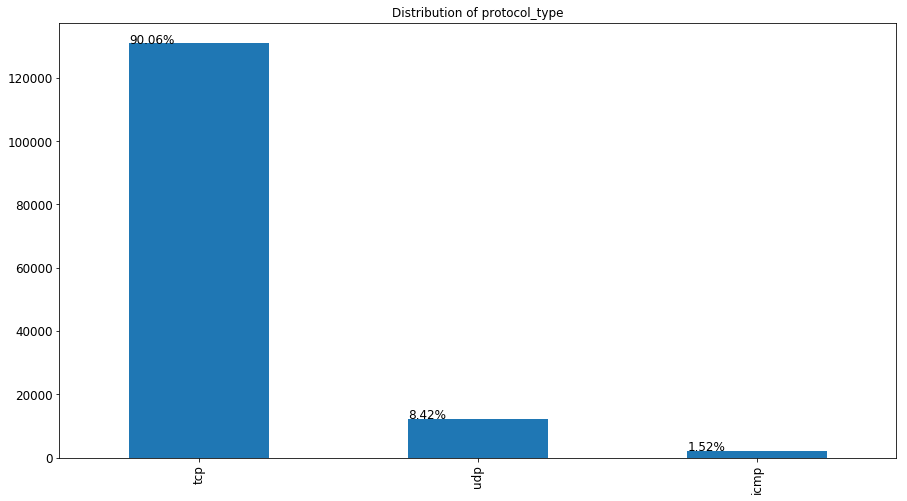

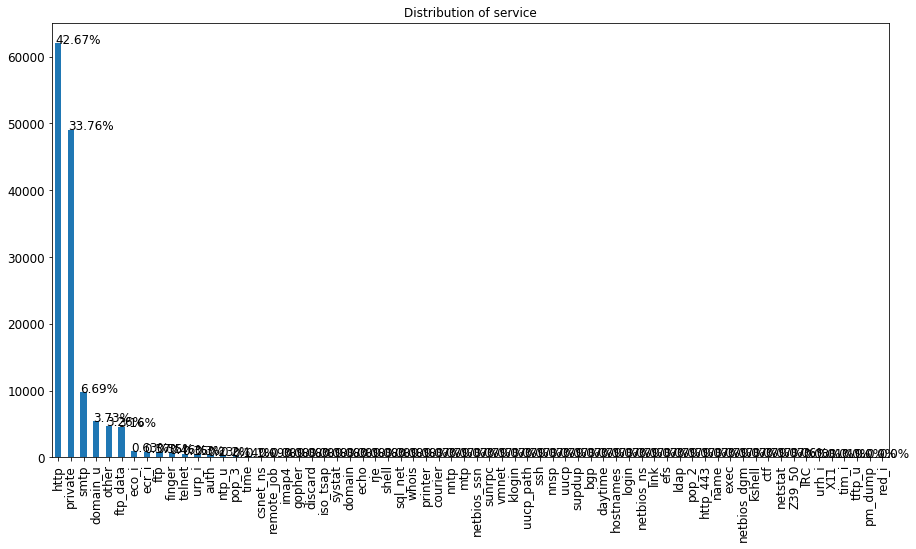

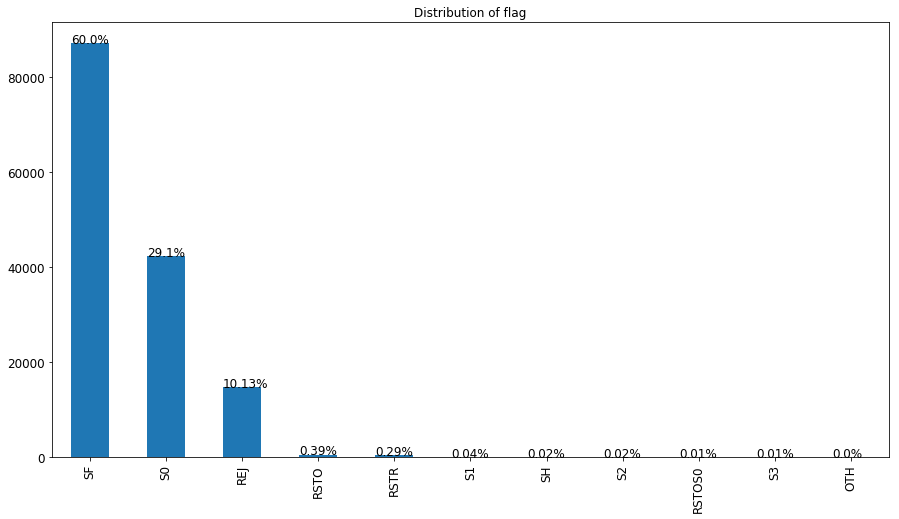

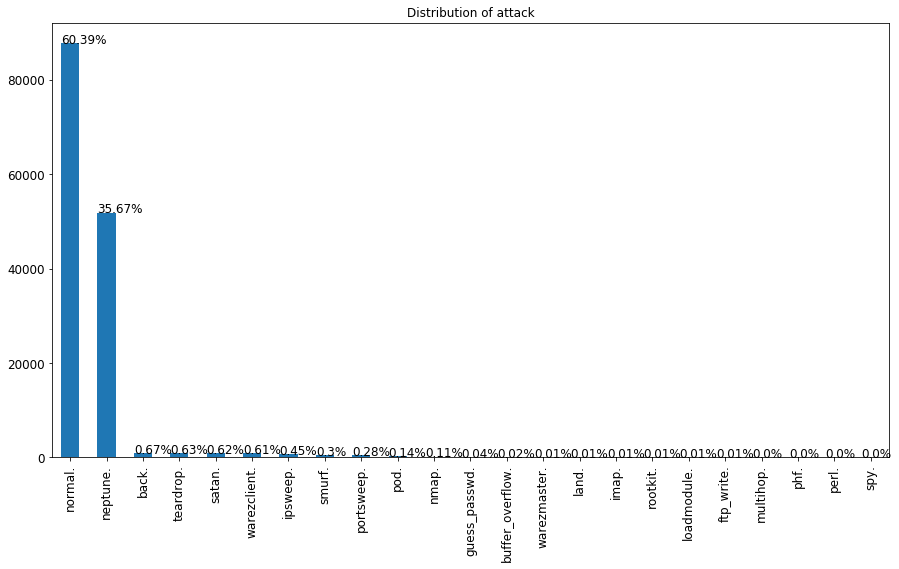

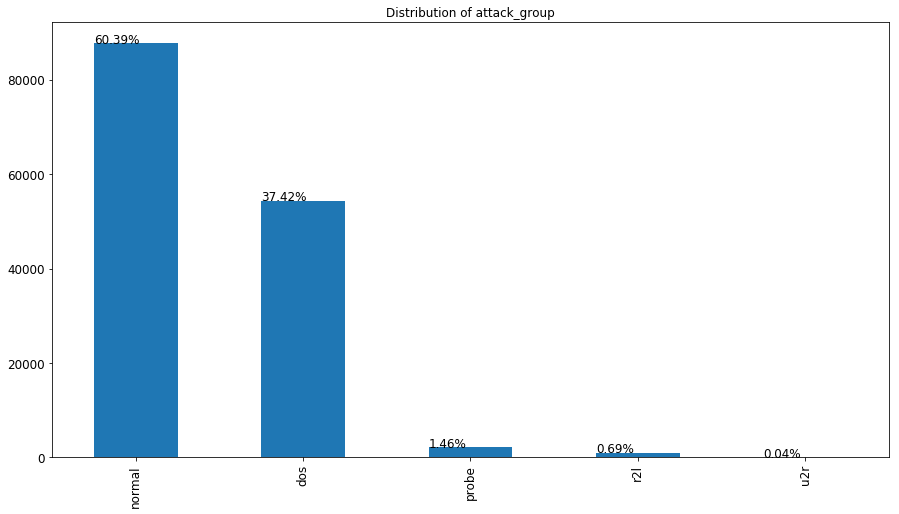

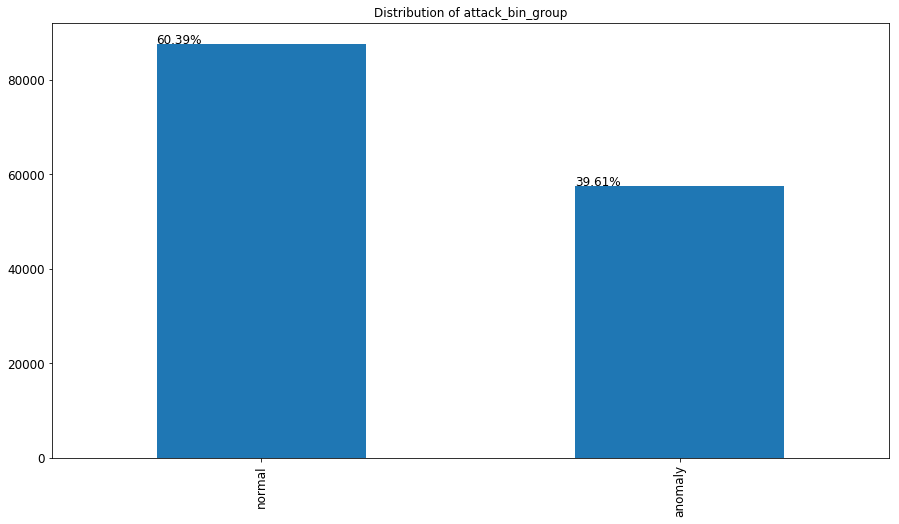

In [25]:
for column in cat_features:
    plot_column_distribution(df_train, column)

<b> Observations: </b>

protocol type: 
- Most of the connections (90.06%) use the protocol "tcp"

flag:

- Flag feature describes the status of the connection – Normal or Error and whether the flag was raised or not.
- Each value in the flag feature represent a different scenario, we will use this feature AS IS.

service:
- Service column has 66 unique value, applying onehot encoding on this columns leads to new 66 columns. lets understand the importance of this column and try to bin if possible.

label:
- Most of the datapoints (60.39%) labeled normal as normal connection and the rest 39.61 % as bad connections.
- In the category of bad connections neptune tops it with 35.67%.
- The categories rootkit, loadmodule, ftp_write,multihop, phf, perl, and spy have very few data points (=<10).
- In conlcusion, the dataset is very imbalaned, we should consider this data imbalnce while building the model to classify the datapoints righly to target lable without bias. 

##### <a> 3.2.1 service column understanding </a>

Lets see the influence of service column on target label.

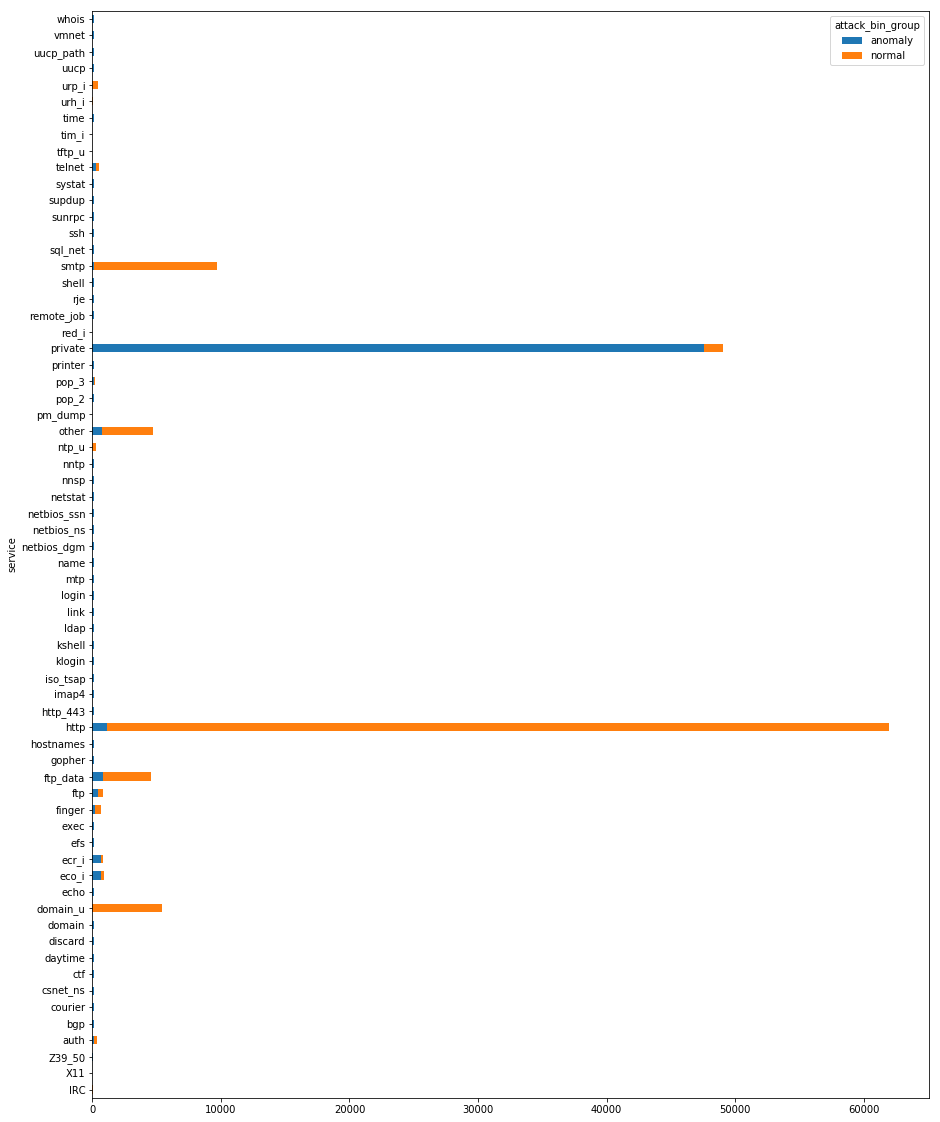

In [26]:
crosstab_service = pd.crosstab(df_train['service'], df_train['attack_bin_group'])
ax = crosstab_service.plot(kind='barh', stacked = True, figsize=(15, 20))

Normalized distribution of service column with overlay of target lable (anomoly vs target)

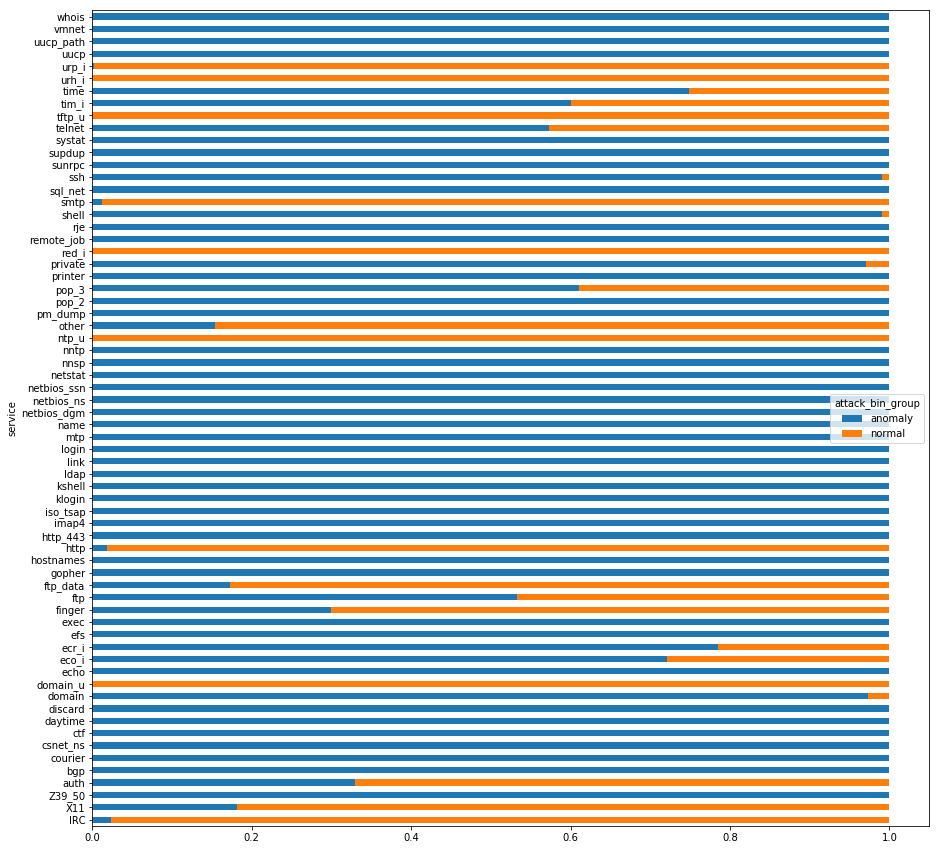

In [27]:
crosstab_service_norm = crosstab_service.div(crosstab_service.sum(1), axis = 0)
crosstab_service_norm.plot(kind='barh', stacked = True, figsize=(15, 15))

Cross tables representing numbers and percentages.

In [28]:
crosstab_service_tab = pd.crosstab(df_train['attack_bin_group'], df_train['service'])

In [29]:
crosstab_service_tab

service,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,http_443,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois
attack_bin_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
anomaly,1,2,91,108,104,108,126,97,103,116,111,1,112,660,647,101,98,200,425,795,117,103,1171,99,117,115,106,98,101,102,103,107,98,98,102,107,95,105,108,0,730,1,101,122,108,47594,0,120,111,110,123,110,104,107,105,115,293,0,3,104,0,1,105,106,106,110
normal,42,9,0,220,0,0,0,0,0,0,3,5424,0,256,177,0,0,468,373,3797,0,0,60829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,290,4006,0,0,78,0,1463,1,0,0,1,9598,0,1,0,0,0,219,1,2,35,14,442,0,0,0,0


In [30]:
round(crosstab_service_tab.div(crosstab_service_tab.sum(0), axis = 1)*100, 1)

service,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,http_443,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois
attack_bin_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
anomaly,2.3,18.2,100.0,32.9,100.0,100.0,100.0,100.0,100.0,100.0,97.4,0.0,100.0,72.1,78.5,100.0,100.0,29.9,53.3,17.3,100.0,100.0,1.9,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,15.4,100.0,100.0,61.0,100.0,97.0,0.0,100.0,100.0,99.1,1.3,100.0,99.0,100.0,100.0,100.0,57.2,0.0,60.0,74.8,0.0,0.2,100.0,100.0,100.0,100.0
normal,97.7,81.8,0.0,67.1,0.0,0.0,0.0,0.0,0.0,0.0,2.6,100.0,0.0,27.9,21.5,0.0,0.0,70.1,46.7,82.7,0.0,0.0,98.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,84.6,0.0,0.0,39.0,0.0,3.0,100.0,0.0,0.0,0.9,98.7,0.0,1.0,0.0,0.0,0.0,42.8,100.0,40.0,25.2,100.0,99.8,0.0,0.0,0.0,0.0


Observations

- We see a few service categories (example: bgp, courier, csnet_ns etc...) represent only anomoly connections.
- In otherway, a few service categories (example: domain_u, ntp_u, red_i etc...) represent only normal connections.
- But there are service categories (example: auth, eco_i, ecr_i etc...) representing both normal and anomoly connections.
- The majority of connections belong to service category http (42.67%) followed by private (33.76%) and smtp (6.69%).

Based on the following observations, the service category can be categorized into following groups good, bad, and ambivalent. Incase of new categories, this look up needs to be updated.

In [31]:
services = ['IRC' ,'X11' ,'Z39_50' ,'auth' ,'bgp' ,'courier' ,'csnet_ns' ,'ctf' ,'daytime' ,'discard' ,'domain' ,
            'domain_u' ,'echo', 'eco_i' ,'ecr_i' ,'efs' ,'exec' ,'finger' ,'ftp' ,'ftp_data' ,'gopher' ,'hostnames',
            'http' ,'http_443' ,'imap4' ,'iso_tsap', 'klogin' ,'kshell' ,'ldap' ,'link' ,'login' ,'mtp' ,'name',
            'netbios_dgm' ,'netbios_ns' ,'netbios_ssn' ,'netstat' ,'nnsp', 'nntp' ,'ntp_u' ,'other' ,'pm_dump',
            'pop_2' ,'pop_3' ,'printer' ,'private' ,'red_i' ,'remote_job' ,'rje' ,'shell' ,'smtp', 'sql_net','ssh',
            'sunrpc' ,'supdup' ,'systat' ,'telnet' ,'tftp_u' ,'tim_i' ,'time' ,'urh_i' ,'urp_i' ,'uucp','uucp_path',
            'vmnet' ,'whois']

In [32]:
x_services = ['ambivalent' ,'ambivalent', 'bad', 'ambivalent', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'ambivalent',
              'good', 'bad', 'ambivalent', 'ambivalent', 'bad', 'bad', 'ambivalent', 'ambivalent', 'ambivalent', 
              'bad', 'bad', 'ambivalent', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 
              'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'ambivalent', 'bad', 'bad', 'ambivalent', 'bad',
              'ambivalent', 'good', 'bad', 'bad', 'ambivalent', 'ambivalent', 'bad', 'bad', 'bad', 'bad', 'bad', 
              'ambivalent', 'good', 'ambivalent', 'ambivalent', 'good', 'ambivalent', 'bad', 'bad', 'bad', 'bad']

service_mapping = {}
for service, X_service in zip(services, x_services):
    service_mapping[service]=X_service

# incase of missing mapping, the catgeory is mapped to ambivalent
df_train['X_service'] = df_train.service.apply(lambda val: service_mapping.get(val, 'ambivalent'))
df_test['X_service'] = df_test.service.apply(lambda val: service_mapping.get(val, 'ambivalent'))

In [33]:
df_train.X_service.value_counts()

ambivalent    135218
good            5731
bad             4347
Name: X_service, dtype: int64

In [34]:
df_test.X_service.value_counts()

ambivalent    68004
good           2684
bad            2374
Name: X_service, dtype: int64

#### <a> 3.3 Boolean Features </a>

In [36]:
bool_features = df_train.columns[df_train.dtypes=='bool']

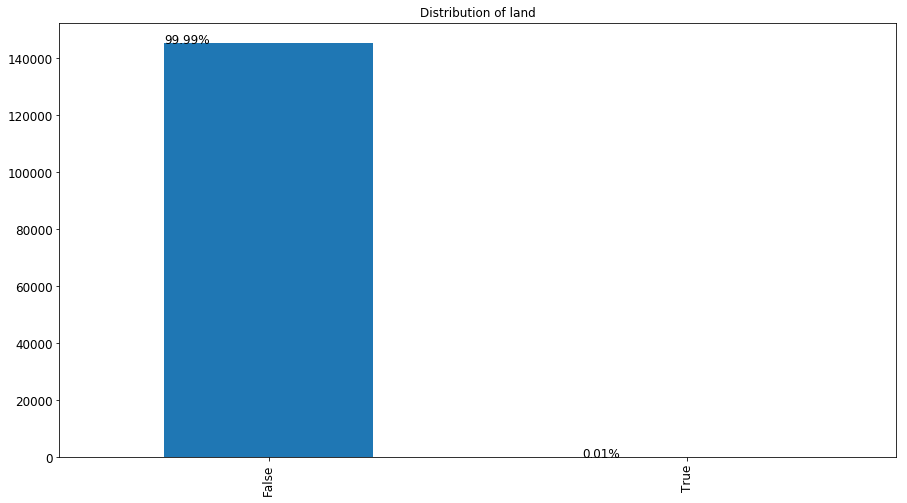

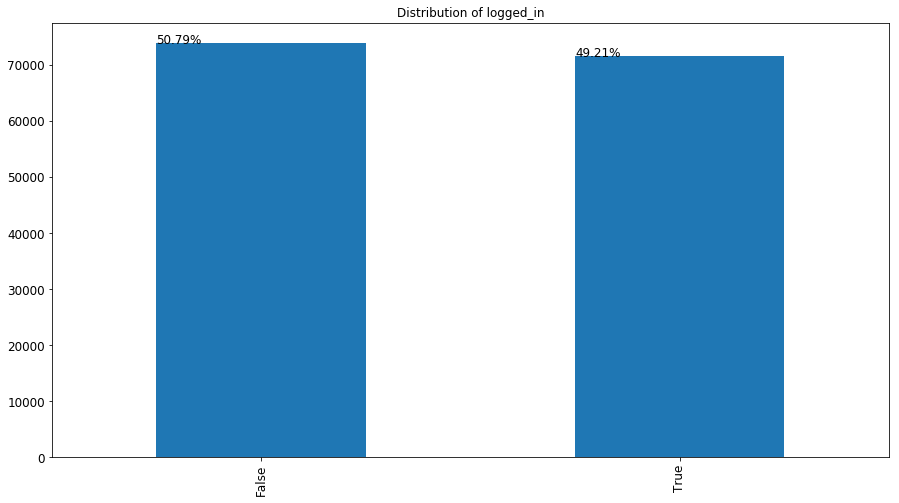

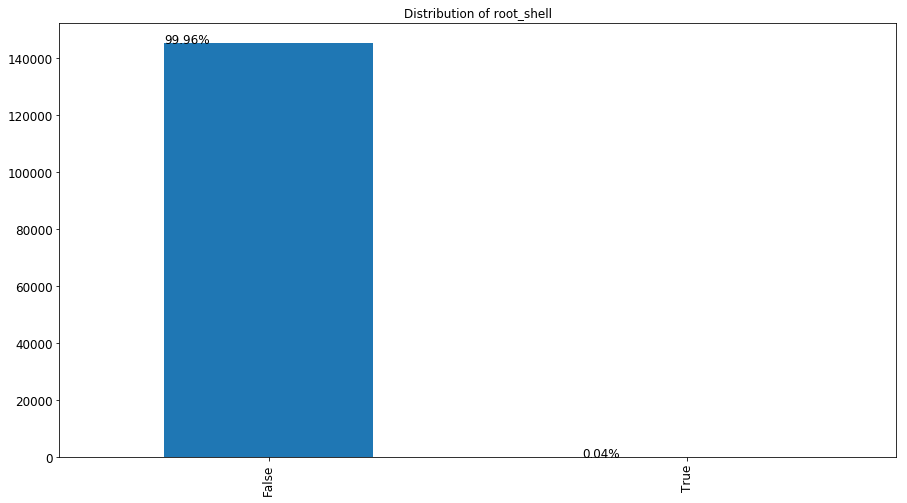

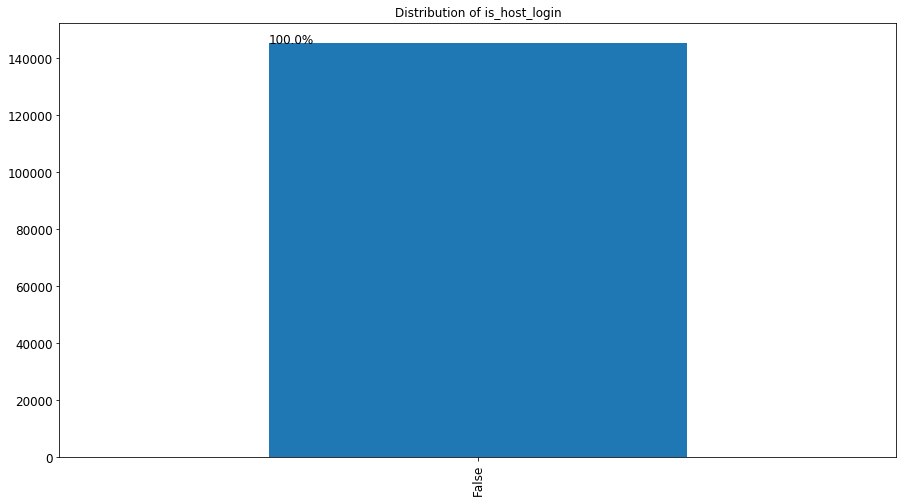

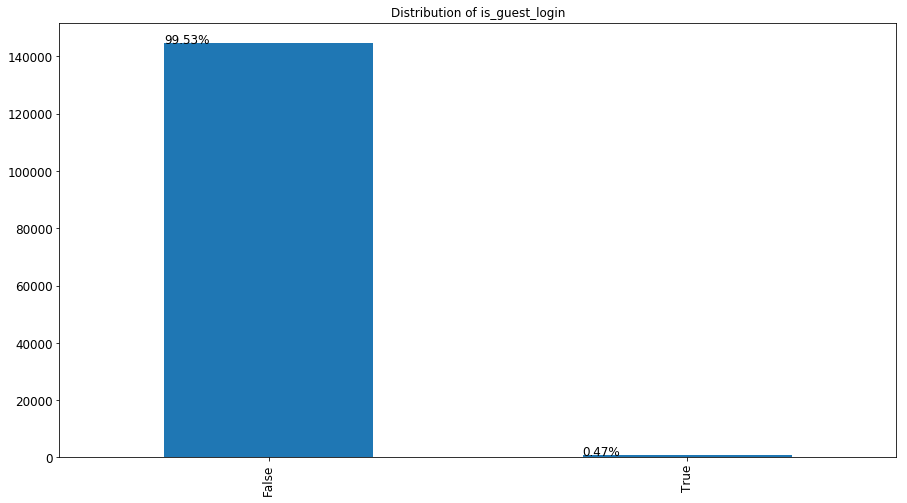

In [37]:
for column in cat_features:
    plot_column_distribution(df_train, column)

<b> Observations: </b>

- is_host_login is constant so, we ingnore this column for both training and prediction.

#### <a> 3.4 Numerical Features </a>